# NOAA High-Resolution Ensemble Forecast (HREF)

In this tutorial we cover:<br>
1) Access and download files<br>
2) Visualize files<br>

Updated every 6 hours: 00, 06, 12, 18 UTC<br>
Timestep: hourly<br>
Only last two days available

https://www.spc.noaa.gov/

In [4]:
# Library
from datetime import datetime, timedelta
import numpy as np
import os
import pandas as pd
import urllib.request

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

# Multidimensional
import netCDF4
import xarray as xr
import cfgrib

## Download data



- **mean:** Arithmetic mean of all members.
- **pmmn:** A “probability matched” mean, which combines information from the ensemble mean 
with the amplitude of the individual members. This version is computed over the full domain simultaneously.
- **lpmm:** A localized “probability matched” mean, which combines information from the ensemble mean 
with the amplitude of the individual members. This version is computed over small regions, 
which then are assembled to cover the full domain. Only for precipitation.
- **avrg:** An averaging of the mean and pmmn output. Only for precipitation.
- **sprd:** The spread of the ensemble, which is a measure of how different the individual model runs are for a variable at a given point 
(smaller spread indicates better agreement within the ensemble)
- **prob:** Probabilistic output; the percentage of the membership meeting a specified threshold such as > 0.5” of accumulated precipitation in a 6 h period). A mix of point probabilities and neighborhood maximum probabilities.
- **eas:** Ensemble Agreement Scale (EAS) probability, which is a smoothed fractional probability, where the size of the neighborhood for computing the fractional probability varies over a 10-100 km radius (smaller radius used where model members agree closely; larger radius used where there is less agreement). Only for precipitation and snow probability products.
- **ffri:** Flash Flood and Average Recurrence Interval exceedance probabilities. CONUS only

In [73]:
# Download
dt_start = datetime(2021, 6, 2)
sim_date = dt_start.strftime('%Y%m%d')

out_list = ['avrg', 'ffri', 'lpmm', 'mean', 'pmmn', 'prob', 'sprd'] #'eas', 

# Define output to download
for output in out_list:
    print(output)
    
    # Forecast start hour
    for sim_hour in range(0,19,6):
        sim_hour_str = '{:02d}'.format(sim_hour)
        #print(f'Forecast start at {sim_hour_str} UTC')
        
        # Create output directory
        out_path = f'../data/href/{sim_date}{sim_hour_str}'
        if os.path.exists(out_path):
            print(f'{out_path} exists!')
        else:
            os.mkdir(out_path)
            print(f'Created {out_path} directory')
        
        # Forecast timestep
        for timestep in range(1,49):
            timestep_str = '{:02d}'.format(timestep)
            #print(f'Forecast timestep {timestep_str}')
            
            # Forecast file
            file_name = f'href.t{sim_hour_str}z.conus.{output}.f{timestep_str}.grib2'
            # URL           
            url = f'https://nomads.ncep.noaa.gov/pub/data/nccf/com/hiresw/prod/href.{sim_date}/ensprod/{file_name}'
            #print(url)
            # Define destination path
            file_out = f'{out_path}/{file_name}'
            
            if os.path.exists(file_out):
                print(f'{file_out} exists!')
            else:
                # Download file
                urllib.request.urlretrieve(url, file_out)
                print(file_out, '... done !')

avrg
../data/href/2021060200 exists!
../data/href/2021060200/href.t00z.conus.avrg.f01.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f02.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f03.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f04.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f05.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f06.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f07.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f08.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f09.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f10.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f11.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f12.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f13.grib2 exists!
../data/href/2021060200/href.t00z.conus.avrg.f14.grib2 ... done !
../data/href/2021060200/href.t00z.conus.avrg.f15.grib2 ... done !
../data/href

## Visualize data


### avrg

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.avrg.f01.grib2', engine='cfgrib')
ds

In [ ]:
ds.tp.plot()

### eas

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.eas.f01.grib2', engine='cfgrib')
ds

In [ ]:
ds.tp.plot()

### ffri

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.ffri.f01.grib2', engine='cfgrib')
ds

In [ ]:
ds.ppffg.plot()

### lpmm

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.lpmm.f01.grib2', engine='cfgrib')
ds

In [ ]:
ds.tp.plot()

### mean

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.mean.f01.grib2', engine='cfgrib', 
                     backend_kwargs={'filter_by_keys':
                                     {'typeOfLevel': 'surface'},
                                     #{'typeOfLevel': 'heightAboveGround'},
                                     #{'typeOfLevel': 'unknown'},
                                     #{'typeOfLevel': 'heightAboveGroundLayer'},
                                    },
                    )
ds

In [ ]:
ds.tp.plot()

### pmmn

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.pmmn.f01.grib2', engine='cfgrib', 
                     backend_kwargs={'filter_by_keys':
                                     {'typeOfLevel': 'surface'},
                                     #{'typeOfLevel': 'heightAboveGround'},
                                     #{'typeOfLevel': 'unknown'},
                                     #{'typeOfLevel': 'heightAboveGroundLayer'},
                                    },
                    )
ds

In [ ]:
ds.tp.plot()

### prob

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.prob.f01.grib2', engine='cfgrib', 
                     backend_kwargs={'filter_by_keys':
                                     {'typeOfLevel': 'surface'},
                                     #{'typeOfLevel': 'heightAboveGround'},
                                     #{'typeOfLevel': 'unknown'},
                                     #filter_by_keys={'typeOfLevel': 'isobaricLayer'}
                                     #filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
                                     #filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
                                     #filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
                                    },
                    )
ds

In [ ]:
ds.tp.plot()

### sprd

In [ ]:
ds = xr.open_dataset('../data/href/2021060100/href.t00z.conus.sprd.f01.grib2', engine='cfgrib', 
                     backend_kwargs={'filter_by_keys':
                                     {'typeOfLevel': 'surface'}
                                     #{'typeOfLevel': 'heightAboveGround'}
                                     #{'typeOfLevel': 'unknown'}
                                     #{'typeOfLevel': 'heightAboveGroundLayer'}
                                     #{'typeOfLevel': 'pressureFromGroundLayer'}
                                     #{'typeOfLevel': 'meanSea'}
                                     #{'typeOfLevel': 'isobaricInhPa'}
                                     #{'typeOfLevel': 'depthBelowLandLayer'}
                                     #{'typeOfLevel': 'cloudBase'}
                                     #{'typeOfLevel': 'isobaricLayer'}
                                    },
                    )
ds

In [ ]:
ds.tp.plot()

## Regrid

**Variables:**

- eas, prob: APCP_P9_L1_GLC0_acc(1h)
- avrg, lpmm, mean, pmmn: APCP_P12_L1_GLC0_acc(1h)


In [76]:
mds = xr.open_mfdataset('../data/href/2021060100/*.PRECIP_FORCING', concat_dim='time', combine='nested')
mds

<xarray.Dataset>
Dimensions:      (south_north: 49, time: 48, west_east: 51)
Dimensions without coordinates: south_north, time, west_east
Data variables:
    lat          (time, south_north, west_east) float32 dask.array<chunksize=(1, 49, 51), meta=np.ndarray>
    lon          (time, south_north, west_east) float32 dask.array<chunksize=(1, 49, 51), meta=np.ndarray>
    precip_rate  (time, south_north, west_east) float64 dask.array<chunksize=(1, 49, 51), meta=np.ndarray>

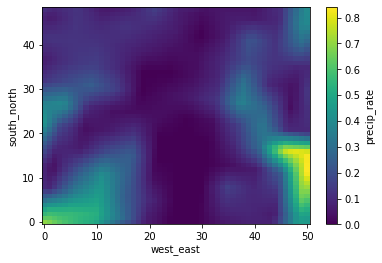

In [83]:
(mds.precip_rate*3600).sum(dim='time').plot()